<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Ahmed Yasser Elgohary Hanafy Mohamed

GUC-ID: 43-2906

Elective Tutorial No.: T-05

**Member 2**

Name: Omar Sameh Ali Abouhegaziah

GUC-ID: 43-1931

Elective Tutorial No.: T-02

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [2]:
# return (x_train, y_train), (x_test, y_test)

# x_train , x_test = np.empty([5000,3072]),np.empty([5000,3072])
# y_train, y_test=[],[]
x_train_airplane = np.array([plt.imread('Data/train/airplane/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=x_train_airplane
# y=np.repeat("airplane",5000)
y_train=np.repeat(0,5000)
x_test_airplane = np.array([plt.imread('Data/test/airplane/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=x_test_airplane
y_test=np.repeat(0,1000)

x_train_automobile = np.array([plt.imread('Data/train/automobile/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=np.concatenate((x_train,x_train_automobile))
y_train=np.concatenate((y_train,np.repeat(1,5000)))
x_test_automobile = np.array([plt.imread('Data/test/automobile/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=np.concatenate((x_test,x_test_automobile))
y_test=np.concatenate((y_test,np.repeat(1,1000)))

x_train_frog = np.array([plt.imread('Data/train/frog/'+str(i)+'.jpg') for i in range (0,5000)])
x_train=np.concatenate((x_train,x_train_frog))
y_train=np.concatenate((y_train,np.repeat(2,5000)))
x_test_frog = np.array([plt.imread('Data/test/frog/'+str(i)+'.jpg') for i in range (0,1000)])
x_test=np.concatenate((x_test,x_test_frog))
y_test=np.concatenate((y_test,np.repeat(2,1000)))

x_train=x_train/255
x_test=x_test/255

# test = np.array([plt.imread('Data/Test/'+str(i)+'.jpg').reshape(-1) for i in range (1,201)])
# train_labels = np.loadtxt('Data/Train/Training Labels.txt')
# test_labels = np.loadtxt('Data/Test/Test Labels.txt')
# print(train.shape, test.shape)

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [3]:
# Write code here
# Train
#airplane
# x_train_airplane=x_train[:5000]
# x_train_not_airplane=x_train[5000:]

X_train=np.reshape(x_train,(15000,32*32*3))
X_test=np.reshape(x_test,(3000,32*32*3))

x_train_airplane=X_train[y_train==0]
x_train_not_airplane=X_train[y_train!=0]

mean_a=x_train_airplane.mean(axis=0)
mean_not_a=x_train_not_airplane.mean(axis=0)

Sw_a=np.zeros([3072])
Sw_not_a=np.zeros([3072])

matrix1=np.array(x_train_airplane-mean_a)
matrix1_transpose=np.transpose(matrix1)
Sw_a=Sw_a+np.matmul(matrix1_transpose,matrix1)

matrix2=np.array(x_train_not_airplane-mean_not_a)
matrix2_transpose=np.transpose(matrix2)
Sw_not_a=Sw_not_a+np.matmul(matrix2_transpose,matrix2)

Sw_airplane=Sw_a+Sw_not_a

Sw_inv_airplane=np.linalg.pinv(Sw_airplane)

airplane_classifier=Sw_inv_airplane @ (mean_a-mean_not_a)
w0_airplane=np.transpose(airplane_classifier)@(-0.5*(mean_a+mean_not_a))

#automobile

x_train_automobile=X_train[y_train==1]
x_train_not_automobile=X_train[y_train!=1]

mean_au=x_train_automobile.mean(axis=0)
mean_not_au=x_train_not_automobile.mean(axis=0)

Sw_au=np.zeros([3072])
Sw_not_au=np.zeros([3072])

matrix1=np.array(x_train_automobile-mean_au)
matrix1_transpose=np.transpose(matrix1)
Sw_au=Sw_au+np.matmul(matrix1_transpose,matrix1)

matrix2=np.array(x_train_not_automobile-mean_not_au)
matrix2_transpose=np.transpose(matrix2)
Sw_not_au=Sw_not_au+np.matmul(matrix2_transpose,matrix2)

Sw_automobile=Sw_au+Sw_not_au
Sw_inv_automobile=np.linalg.pinv(Sw_automobile)

automobile_classifier=Sw_inv_automobile @ (mean_au-mean_not_au)
w0_automobile=np.transpose(automobile_classifier)@(-0.5*(mean_au+mean_not_au))

#frog

x_train_frog=X_train[y_train==2]
x_train_not_frog=X_train[y_train!=2]

mean_f=x_train_frog.mean(axis=0)
mean_not_f=x_train_not_frog.mean(axis=0)

Sw_f=np.zeros([3072])
Sw_not_f=np.zeros([3072])

matrix1=np.array(x_train_frog-mean_f)
matrix1_transpose=np.transpose(matrix1)
Sw_f=Sw_f+np.matmul(matrix1_transpose,matrix1)

matrix2=np.array(x_train_not_frog-mean_not_f)
matrix2_transpose=np.transpose(matrix2)
Sw_not_f=Sw_not_f+np.matmul(matrix2_transpose,matrix2)

Sw_frog=Sw_f+Sw_not_f

Sw_inv_frog=np.linalg.pinv(Sw_frog)

frog_classifier=Sw_inv_frog @ (mean_f-mean_not_f)
w0_frog=np.transpose(frog_classifier)@(-0.5*(mean_f+mean_not_f))


# Test
y_airplane=np.matmul(np.transpose(airplane_classifier),np.transpose(X_test))+w0_airplane
y_automobile=np.matmul(np.transpose(automobile_classifier),np.transpose(X_test))+w0_automobile
y_frog=np.matmul(np.transpose(frog_classifier),np.transpose(X_test))+w0_frog

prediction=np.zeros([3000])

for i in range(len(X_test)):
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))

# confusion_matrix = 

## Confusion Matrix (Don't Edit)

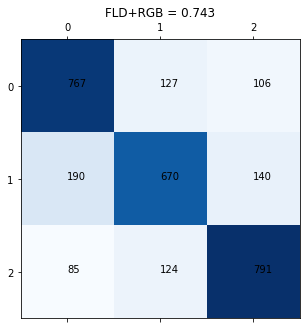

In [4]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [5]:
# Write code here
#convert to greyscale
X_train=np.reshape(x_train,(15000,32*32,3))
X_test=np.reshape(x_test,(3000,32*32,3))

temp=np.empty((15000,1024))
for i in range(len(X_train)):
    for j in range(len(X_train[i])):
        temp[i,j]= 0.3*X_train[i,j,0]+ 0.59*X_train[i,j,1] + 0.11*X_train[i,j,2]

X_train=temp
temp1=np.empty((3000,1024))
for i in range(len(X_test)):
    for j in range(len(X_test[i])):
        temp1[i,j]= 0.31*X_test[i,j,0]+ 0.59*X_test[i,j,1] + 0.11*X_test[i,j,2]
X_test=temp1
# Train
X_train=np.reshape(X_train,(15000,32*32))
X_test=np.reshape(X_test,(3000,32*32))

x_train_airplane=X_train[y_train==0]
x_train_not_airplane=X_train[y_train!=0]

mean_a=x_train_airplane.mean(axis=0)
mean_not_a=x_train_not_airplane.mean(axis=0)

Sw_a=np.zeros([1024])
Sw_not_a=np.zeros([1024])

matrix1=np.array(x_train_airplane-mean_a)
matrix1_transpose=np.transpose(matrix1)
Sw_a=Sw_a+np.matmul(matrix1_transpose,matrix1)

matrix2=np.array(x_train_not_airplane-mean_not_a)
matrix2_transpose=np.transpose(matrix2)
Sw_not_a=Sw_not_a+np.matmul(matrix2_transpose,matrix2)

Sw_airplane=Sw_a+Sw_not_a
# print(Sw_airplane)

Sw_inv_airplane=np.linalg.pinv(Sw_airplane)

airplane_classifier=Sw_inv_airplane @ (mean_a-mean_not_a)
w0_airplane=np.transpose(airplane_classifier)@(-0.5*(mean_a+mean_not_a))

#automobile

x_train_automobile=X_train[y_train==1]
x_train_not_automobile=X_train[y_train!=1]

mean_au=x_train_automobile.mean(axis=0)
mean_not_au=x_train_not_automobile.mean(axis=0)

Sw_au=np.zeros([1024])
Sw_not_au=np.zeros([1024])

matrix1=np.array(x_train_automobile-mean_au)
matrix1_transpose=np.transpose(matrix1)
Sw_au=Sw_au+np.matmul(matrix1_transpose,matrix1)

matrix2=np.array(x_train_not_automobile-mean_not_au)
matrix2_transpose=np.transpose(matrix2)
Sw_not_au=Sw_not_au+np.matmul(matrix2_transpose,matrix2)

Sw_automobile=Sw_au+Sw_not_au
Sw_inv_automobile=np.linalg.pinv(Sw_automobile)

automobile_classifier=Sw_inv_automobile @ (mean_au-mean_not_au)
w0_automobile=np.transpose(automobile_classifier)@(-0.5*(mean_au+mean_not_au))

#frog

x_train_frog=X_train[y_train==2]
x_train_not_frog=X_train[y_train!=2]

mean_f=x_train_frog.mean(axis=0)
mean_not_f=x_train_not_frog.mean(axis=0)

Sw_f=np.zeros([1024])
Sw_not_f=np.zeros([1024])

matrix1=np.array(x_train_frog-mean_f)
matrix1_transpose=np.transpose(matrix1)
Sw_f=Sw_f+np.matmul(matrix1_transpose,matrix1)

matrix2=np.array(x_train_not_frog-mean_not_f)
matrix2_transpose=np.transpose(matrix2)
Sw_not_f=Sw_not_f+np.matmul(matrix2_transpose,matrix2)

Sw_frog=Sw_f+Sw_not_f

Sw_inv_frog=np.linalg.pinv(Sw_frog)

frog_classifier=Sw_inv_frog @ (mean_f-mean_not_f)
w0_frog=np.transpose(frog_classifier)@(-0.5*(mean_f+mean_not_f))


# Test
y_airplane=np.matmul(np.transpose(airplane_classifier),np.transpose(X_test))+w0_airplane
y_automobile=np.matmul(np.transpose(automobile_classifier),np.transpose(X_test))+w0_automobile
y_frog=np.matmul(np.transpose(frog_classifier),np.transpose(X_test))+w0_frog

prediction=np.zeros([3000])

for i in range(len(X_test)):
    # if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
    # prediction[i]=0
    if(y_airplane[i]>y_automobile[i] and y_airplane[i]>y_frog[i]):
        prediction[i]=0
    
    if(y_automobile[i]>y_airplane[i] and y_automobile[i]>y_frog[i]):
        prediction[i]=1
    
    if(y_frog[i]>y_airplane[i] and y_frog[i]>y_automobile[i]):
        prediction[i]=2

pred1=prediction[:1000]
pred2=prediction[1000:2000]
pred3=prediction[2000:3000]
(unique1, counts1) = np.unique(pred1, return_counts=True)
(unique2, counts2) = np.unique(pred2,return_counts=True)
(unique3, counts3) = np.unique(pred3,return_counts=True)
confusion_matrix=np.concatenate(([counts1],[counts2],[counts3]))
# Test
# confusion_matrix = 

## Confusion Matrix (Don't Edit)

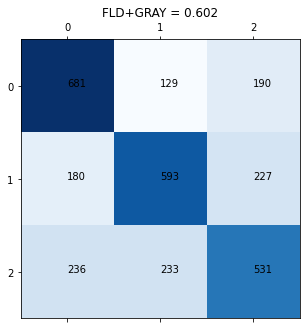

In [6]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########


The RGB picture produce a better accuracy when compared to the grayscale image, which can be attributed to the RGB pictures having more details (the R and G and B component) which helps in seperating the classes more. 

The class with the biggest change is the frog, which can be attributed to the frog's images being easily distinguishable in the RGB space since it has high values in the G component, which is lost in the greyscale images.

...
...
...

##########
<hr style="border:2px solid black"> </hr>